<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team44/blob/main/Reto_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey**

Maestría en Inteligencia Artificial Aplicada

> Curso: Ciencia y Analítica de Datos

> Entregable : Reto Entrega 2 Clasificación-ensambles 

>Fecha: 18/11/2022

>Profesores:

>* María de la Paz Rico Fernández
>* Roberto Antonio Guevara González

> Alumnos:
*   LUIS ALFONSO SABANERO ESQUIVEL - A01273286
*   AQUILES YONATAN ARMENTA HERNANDEZ - A01793252

https://github.com/PosgradoMNA/actividades-del-projecto-team44

In [ ]:
# IMPLEMENTACION DE LIBRERIAS PARA MANIPUACION DE LA BASE DE DATOS ASI COMO LA VISUALIZACION DE LA INFORMACION.
import pandas as pd   
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer

In [ ]:
# LECTURA DEL ARCHIVO CON LA INFORMACION, ASI COMO LA VISUALIZACION DE LOS PRIMEROS REGISTROS.
df_subterraneo=pd.read_csv('Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_subterraneo.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
subterranero_copy=df_subterraneo.copy()
# ELIMINAMOS LA INFORMACION QUE CONTIENE INFORMACION NULL Y QUE NO TIENE CASO MAANTENER YA QUE YA EXISTEN
# INDICADORES QUE NOS INDICAN SI SE ENCUENTRA CONTAMINADA Y NO ES NECESARIO REALIZAR NUEVAMENTE EL CALCULO
# LOS VALORES SI O NO DE LOS CONTAMINANTES QUE ESTAN EN OTRAS COLUMNAS SON NECESARIOS PARA ESTA PRACTICA.
subterranero_copy.drop(columns="SDT_mg/L",inplace=True)
subterranero_copy.drop(columns="PERIODO",inplace=True) 
subterranero_copy.drop(columns="CLAVE",inplace=True)
subterranero_copy.drop(columns="ALC_mg/L",inplace=True)
subterranero_copy.drop(columns="CONDUCT_mS/cm",inplace=True)
subterranero_copy.drop(columns="SDT_M_mg/L",inplace=True)
subterranero_copy.drop(columns="FLUORUROS_mg/L",inplace=True)
subterranero_copy.drop(columns="DUR_mg/L",inplace=True)
subterranero_copy.drop(columns="COLI_FEC_NMP/100_mL",inplace=True) 
subterranero_copy.drop(columns="N_NO3_mg/L",inplace=True) 
subterranero_copy.drop(columns="AS_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="CD_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="CR_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="HG_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="MN_TOT_mg/L",inplace=True) 
subterranero_copy.drop(columns="FE_TOT_mg/L",inplace=True)
subterranero_copy.drop(columns="PB_TOT_mg/L",inplace=True) 

subterranero_copy.drop(columns="LONGITUD",inplace=True) 
subterranero_copy.drop(columns="LATITUD",inplace=True) 

subterranero_copy.drop(columns="CONTAMINANTES",inplace=True) 


# LOS DATOS COMO ESTADO , MUNICIPIO, ACUIFERO , SITIO Y ORGANISMO DE CUENCA, SE ELIMINAN, YA QUE
# TENEMOS LA LATITUD Y LA LONGITUD PARA PODERLOS POSICIONAR EN UN MAPA.
subterranero_copy.drop(columns="SITIO",inplace=True) 
subterranero_copy.drop(columns="ORGANISMO_DE_CUENCA",inplace=True) 
subterranero_copy.drop(columns="MUNICIPIO",inplace=True) 
subterranero_copy.drop(columns="ACUIFERO",inplace=True) 
subterranero_copy.drop(columns="ESTADO",inplace=True)

#ELIMINADOS COLUMNAS CUMPLE DEBIDO A UNA QUE SE TIENE CORRELACIONES FUERTES 1 CON OTRAS COLUMNAS
subterranero_copy.drop(columns="CUMPLE_CON_ALC",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_COND",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_SDT_ra",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_SDT_salin",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_FLUO",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_DUR",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_CF",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_NO3",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_AS",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_CD",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_CR",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_HG",inplace=True)
subterranero_copy.drop(columns="CUMPLE_CON_PB",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_MN",inplace=True) 
subterranero_copy.drop(columns="CUMPLE_CON_FE",inplace=True)  


## LIMPIEZA Y ESTANDARIZACION

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_ALC POR VALORES NUMERICOS , Y SE ESTANDARIZA UN VALOR COMO BAJO
# PARA TENER SOLO CATEGORIAS DE ALTA , MEDIA Y BAJA.
subterranero_copy['CALIDAD_ALC'].fillna(1,inplace=True)  # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_ALC'].replace(['Alta'],0,inplace=True)
subterranero_copy['CALIDAD_ALC'].replace(['Media'],1,inplace=True)
subterranero_copy['CALIDAD_ALC'].replace(['Baja'],2,inplace=True)
subterranero_copy['CALIDAD_ALC'].replace(['Indeseable como FAAP'],2,inplace=True) 

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_ALC'].unique()

array([0, 1, 2])

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_CONDUC POR VALORES NUMERICOS
subterranero_copy['CALIDAD_CONDUC'].fillna(3,inplace=True) # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_CONDUC'].replace(['Excelente para riego'],0,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Permisible para riego'],1,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Buena para riego'],2,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Dudosa para riego'],3,inplace=True)
subterranero_copy['CALIDAD_CONDUC'].replace(['Indeseable para riego'],4,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_CONDUC'].unique()

array([1, 2, 3, 4, 0])

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_SDT_ra POR VALORES NUMERICOS
subterranero_copy['CALIDAD_SDT_ra'].fillna(3,inplace=True) # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_SDT_ra'].replace(['Cultivos sensibles'],0,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Excelente para riego'],1,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Cultivos con manejo especial'],2,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Cultivos tolerantes'],3,inplace=True)
subterranero_copy['CALIDAD_SDT_ra'].replace(['Indeseable para riego'],4,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_SDT_ra'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_SDT_salin POR VALORES NUMERICOS
subterranero_copy['CALIDAD_SDT_salin'].fillna(2,inplace=True) # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_SDT_salin'].replace(['Potable - Dulce'],0,inplace=True)
subterranero_copy['CALIDAD_SDT_salin'].replace(['Ligeramente salobres'],1,inplace=True)
subterranero_copy['CALIDAD_SDT_salin'].replace(['Salobres'],2,inplace=True)
subterranero_copy['CALIDAD_SDT_salin'].replace(['Salinas'],3,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_SDT_salin'].unique()

array([0, 1, 2, 3])

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_FLUO POR VALORES NUMERICOS
subterranero_copy['CALIDAD_FLUO'].replace(['Potable - Optima'],0,inplace=True)
subterranero_copy['CALIDAD_FLUO'].replace(['Alta'],1,inplace=True)
subterranero_copy['CALIDAD_FLUO'].replace(['Baja'],2,inplace=True)
subterranero_copy['CALIDAD_FLUO'].replace(['Media'],3,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_FLUO'].unique()

array([0, 1, 2, 3])

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_DUR POR VALORES NUMERICOS
subterranero_copy['CALIDAD_DUR'].fillna(2,inplace=True)  # REMPLAZAMOS NULOS POR UN VALOR DEFAULT
subterranero_copy['CALIDAD_DUR'].replace(['Potable - Suave'],0,inplace=True)
subterranero_copy['CALIDAD_DUR'].replace(['Potable - Moderadamente suave'],1,inplace=True)
subterranero_copy['CALIDAD_DUR'].replace(['Potable - Dura'],2,inplace=True)
subterranero_copy['CALIDAD_DUR'].replace(['Muy dura e indeseable usos industrial y domestico'],3,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_DUR'].unique()

array([2, 3, 0, 1])

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_DUR POR VALORES NUMERICOS
lista=['CALIDAD_AS','CALIDAD_N_NO3']
subterranero_copy['CALIDAD_N_NO3'].fillna(1,inplace=True) #Los clasificamos como Media por default
for i in lista:
    subterranero_copy[i].replace(['Potable - Excelente'],0,inplace=True)
    subterranero_copy[i].replace(['Potable - Buena calidad'],1,inplace=True)
    subterranero_copy[i].replace(['Apta como FAAP'],1,inplace=True)
    subterranero_copy[i].replace(['No apta como FAAP'],2,inplace=True)

In [ ]:
# CONVERTIMOS LOS VALORES DE CALIDAD_COLI_FEC POR VALORES NUMERICOS
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Potable - Excelente'],0,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Aceptable'],1,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Buena calidad'],2,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Contaminada'],3,inplace=True)
subterranero_copy['CALIDAD_COLI_FEC'].replace(['Fuertemente contaminada'],4,inplace=True)

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['CALIDAD_COLI_FEC'].unique()

array([0, 1, 3, 2, 4])

In [ ]:
lista=['CALIDAD_PB','CALIDAD_HG','CALIDAD_CR','CALIDAD_CD']
for i in lista:
    subterranero_copy[i].replace(['Potable - Excelente'],0,inplace=True)
    subterranero_copy[i].replace(['No apta como FAAP'],1,inplace=True)

In [ ]:
lista=['CALIDAD_MN','CALIDAD_FE']
for i in lista:
    subterranero_copy[i].replace(['Potable - Excelente'],0,inplace=True)
    subterranero_copy[i].replace(['Sin efectos en la salud - Puede dar color al agua'],1,inplace=True)
    subterranero_copy[i].replace(['Puede afectar la salud'],2,inplace=True) #Lo mandamos como baja

In [ ]:
# ESTANDARIZAMOS LOS VALORES DE SUBTIPO
subterranero_copy['SUBTIPO'].replace(['Pozo','POZO NORIA'],"POZO",inplace=True)
subterranero_copy['SUBTIPO'].replace(['BOMBEO CENOTE'],"CENOTE",inplace=True)

label_encoder = LabelEncoder()
subterranero_copy['SUBTIPO']= label_encoder.fit_transform(subterranero_copy['SUBTIPO'])

# VERIFICAMOS QUE LA MUESTRA SOLO CONTENGA LOS VALORES DEFINIDOS.
subterranero_copy['SUBTIPO'].unique()

array([4, 2, 3, 1, 0])

In [ ]:
# CONVERTIMOS LOS VALORES ALFABETICOS DEL SEMAFORO A VALORES NUMERICOS
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
subterranero_copy['SEMAFORO']= label_encoder.fit_transform(subterranero_copy['SEMAFORO'])
subterranero_copy['SEMAFORO'].unique()

array([2, 1, 0])

In [ ]:
# Transformaciones a factores categóricos de entrada:
categorical_pipeline = Pipeline(steps = [('impModa', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                                )])  
categorical_pipeline_nombres = ['SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                                'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', categorical_pipeline, categorical_pipeline_nombres)],
                                        remainder='passthrough')

In [ ]:
# VERIFICAMOS QUE LA INFORMACION ESTE ESTANDARIZADA Y LIMPIA
subterranero_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SUBTIPO            1068 non-null   int64
 1   CALIDAD_ALC        1068 non-null   int64
 2   CALIDAD_CONDUC     1068 non-null   int64
 3   CALIDAD_SDT_ra     1068 non-null   int64
 4   CALIDAD_SDT_salin  1068 non-null   int64
 5   CALIDAD_FLUO       1068 non-null   int64
 6   CALIDAD_DUR        1068 non-null   int64
 7   CALIDAD_COLI_FEC   1068 non-null   int64
 8   CALIDAD_N_NO3      1068 non-null   int64
 9   CALIDAD_AS         1068 non-null   int64
 10  CALIDAD_CD         1068 non-null   int64
 11  CALIDAD_CR         1068 non-null   int64
 12  CALIDAD_HG         1068 non-null   int64
 13  CALIDAD_PB         1068 non-null   int64
 14  CALIDAD_MN         1068 non-null   int64
 15  CALIDAD_FE         1068 non-null   int64
 16  SEMAFORO           1068 non-null   int64
dtypes: int64(17)
m

## Modelo Dummy

In [ ]:
X = subterranero_copy.iloc[:,0:16] # SELECCIONAMOS LAS 15 VARIABLES DE ENTRADA PARA LA SEGMENTACION DE LA MUESTRA
y = subterranero_copy['SEMAFORO'] # SELECCIONAMOS LA VARIABLE DE SALIDA 

In [ ]:
modelo = RandomForestClassifier()
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])

modelo_RF = pipeline.fit(X,y)

results_RF = modelo_RF.predict(X)

In [ ]:
modelo_RF['m'].feature_importances_

array([0.00305927, 0.02547403, 0.02636645, 0.03323451, 0.03120469,
       0.21650981, 0.14726839, 0.09722727, 0.11092879, 0.12530189,
       0.00234868, 0.02079189, 0.00105599, 0.01711371, 0.06986453,
       0.07225008])

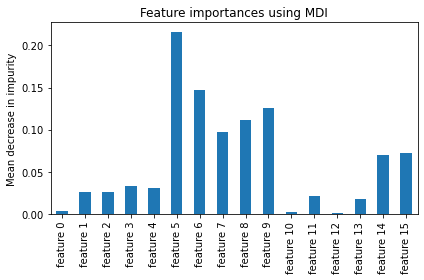

In [ ]:
importances = modelo_RF['m'].feature_importances_
std = np.std([modelo_RF['m'].feature_importances_ for tree in modelo_RF['m'].estimators_], axis=0)
fig, ax = plt.subplots()
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
subterranero_features=subterranero_copy.copy()
importancia_predictores = pd.DataFrame(
                            {'predictor': subterranero_features.drop(columns = "SEMAFORO").columns,
                             'importancia': modelo_RF['m'].feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,CALIDAD_FLUO,0.216510
6,CALIDAD_DUR,0.147268
9,CALIDAD_AS,0.125302
8,CALIDAD_N_NO3,0.110929
7,CALIDAD_COLI_FEC,0.097227
15,CALIDAD_FE,0.072250
14,CALIDAD_MN,0.069865
3,CALIDAD_SDT_ra,0.033235
4,CALIDAD_SDT_salin,0.031205
2,CALIDAD_CONDUC,0.026366


## Modelos Finales

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,metrica):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,10))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(metrica)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()


# Transformaciones a factores categóricos de entrada:
categorical_pipeline = Pipeline(steps = [('impModa', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                                )])  
categorical_pipeline_nombres = ['CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                                'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CR','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', categorical_pipeline, categorical_pipeline_nombres)],
                                        remainder='passthrough')

In [ ]:
subterranero_model=subterranero_copy.copy()
subterranero_model.drop(columns="SUBTIPO",inplace=True)
subterranero_model.drop(columns="CALIDAD_CD",inplace=True)
subterranero_model.drop(columns="CALIDAD_HG",inplace=True)


X = subterranero_model.iloc[:,0:13] # SELECCIONAMOS LAS 15 VARIABLES DE ENTRADA PARA LA SEGMENTACION DE LA MUESTRA
y = subterranero_model['SEMAFORO'] # SELECCIONAMOS LA VARIABLE DE SALIDA 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80) # PARTIMOS LA MUESRA AL 80%

In [ ]:
print("Registros Totales: " + str(len(subterranero_copy)))
print("Registros de Entrenamiento: " + str(len(X_train)))
print("Registros de Validación: " + str(len(X_test)))

Registros Totales: 1068
Registros de Entrenamiento: 854
Registros de Validación: 214


In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',DecisionTreeClassifier())])
lst_min_samples_split = [i for i in range(2, 11)]
param_grid = {
    'm__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': lst_min_samples_split,
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring='accuracy',
                    n_jobs=-1
                    )

grid.fit(X_train, y_train)

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)


Mejor valor de accuracy obtenido con la mejor combinación: 0.9816488934755189
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.0001, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 11, 'm__min_samples_split': 9}


In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',RandomForestClassifier())])
lst_min_samples_split = [i for i in range(2, 11)]
param_grid = {
    'm__ccp_alpha':[0.01,0.1,1.0,10.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': lst_min_samples_split,
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring='accuracy',
                    n_jobs=-1
                    )

grid.fit(X_train, y_train)

print('Mejor valor de precision obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)

Mejor valor de precision obtenido con la mejor combinación: 0.964868707717005
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.01, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 16, 'm__min_samples_split': 2}


### Modelos Final Decision Tree

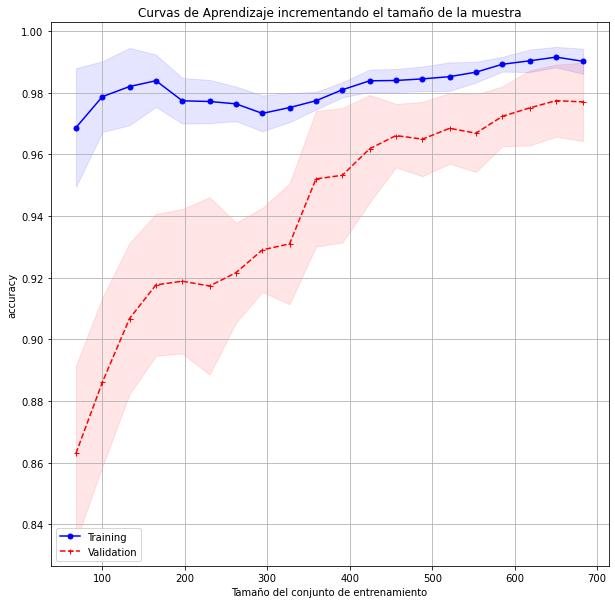

In [ ]:
modelo_DT = DecisionTreeClassifier(ccp_alpha=0.0001,class_weight=None,criterion='gini',max_depth=11,min_samples_split=9)
pipeline_DT = Pipeline(steps=[('ct',columnasTransformer), ('m',modelo_DT)])


delta_train_sz = np.linspace(0.1,1,20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
metrica="accuracy"
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline_DT,    
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = cv ,
                                                 scoring='accuracy',
                                                 train_sizes = delta_train_sz ,
                                                 )

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metrica)

In [ ]:
#{'m__ccp_alpha': 0.0001, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 11, 'm__min_samples_split': 9}
modelo_FDT= DecisionTreeClassifier(ccp_alpha=0.0001,class_weight=None,criterion='gini',max_depth=11,min_samples_split=9)
pipeline_FDT = Pipeline(steps=[('ct',columnasTransformer), ('m',modelo_FDT)])
modelo_FDT = pipeline_FDT.fit(X_train,y_train)

results_FDT = modelo_FDT.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,results_FDT))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.92      0.99      0.94      0.95      0.90        49
          1       0.97      0.97      0.99      0.97      0.98      0.96        80
          2       0.98      1.00      0.98      0.99      0.99      0.99        85

avg / total       0.97      0.97      0.99      0.97      0.98      0.96       214



In [ ]:
print(classification_report(y_test,results_FDT))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        49
           1       0.97      0.97      0.97        80
           2       0.98      1.00      0.99        85

    accuracy                           0.97       214
   macro avg       0.97      0.96      0.97       214
weighted avg       0.97      0.97      0.97       214



In [ ]:
mc_dt=confusion_matrix(y_test,results_FDT)

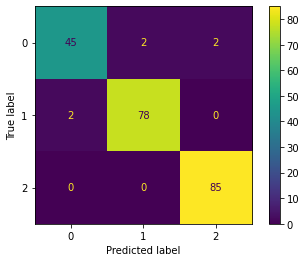

In [ ]:
mc_dt_plot=ConfusionMatrixDisplay(mc_dt)
mc_dt_plot.plot()

### Modelos Final Random Forest

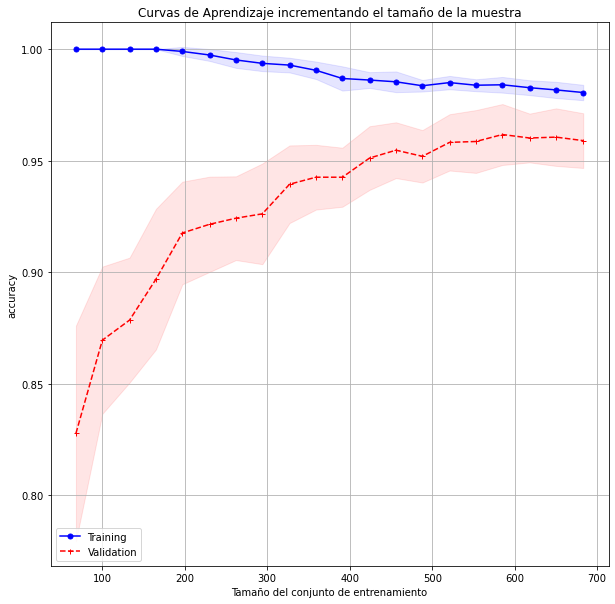

In [ ]:
modelo_RFF = RandomForestClassifier(ccp_alpha=0.01,class_weight=None,criterion='entropy',max_depth=16,min_samples_split=2)
pipeline_RFF = Pipeline(steps=[('ct',columnasTransformer),('m',modelo_RFF)])

delta_train_sz = np.linspace(0.1,1,20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
metrica="accuracy"
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline_RFF,    
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = cv ,
                                                 scoring='accuracy',
                                                 train_sizes = delta_train_sz ,
                                                 )

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metrica)

In [ ]:
#{'m__ccp_alpha': 0.01, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 16, 'm__min_samples_split': 2}
modelo = RandomForestClassifier(ccp_alpha=0.01,class_weight=None,criterion='entropy',max_depth=16,min_samples_split=2)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])

modelo_RFF = pipeline.fit(X_train,y_train)

results_RFF = modelo_RFF.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,results_RFF))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.92      0.97      0.91      0.94      0.89        49
          1       0.97      0.91      0.99      0.94      0.95      0.89        80
          2       0.96      1.00      0.97      0.98      0.98      0.97        85

avg / total       0.95      0.95      0.98      0.95      0.96      0.92       214



In [ ]:
print(classification_report(y_test,results_RFF))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.97      0.91      0.94        80
           2       0.96      1.00      0.98        85

    accuracy                           0.95       214
   macro avg       0.94      0.94      0.94       214
weighted avg       0.95      0.95      0.95       214



In [ ]:
mc=confusion_matrix(y_test,results_RFF)
mc

array([[45,  2,  2],
       [ 5, 73,  2],
       [ 0,  0, 85]])

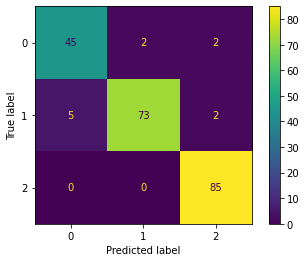

In [ ]:
mc_plot=ConfusionMatrixDisplay(mc)
mc_plot.plot()

## Conclusiones 

Durante el análisis del dataset de aguas subterráneas, se realizó un análisis de features con el motivo de conocer que variables podrían ser descartables. Donde se encontraron que las columnas que menos aportaron información fueron SUBTIPO, CALIDAD_CD, CALIDAD_HG.
Lo cual indica que para el desarrollo de los modelos, conocer el tipo de acuífero no contribuye demasiado al semáforo. Las columnas calidad CD y calidad HG que representa la calidad del agua de acuerdo con el cadmio y el mercurio totales tampoco mostraron ser relevantes para los modelos.

Durante este análisis multivariable se usaron los modelos de árbol de decisión y bosque aleatorio con el objetivo de clasificar de acuerdo con la variable semáforo la calidad del agua. Donde el modelo que mejores resultados mostro fue el árbol de decisión, que tomando en cuenta la métrica accuracy llego a un 98% de resultado. Revisando las curvas de aprendizaje y los reportes de métrica indican que no cuenta con un subentrenamiento o con sobreentrenamiento.
Dando como resultado un modelo fiable para trabajar con este data set.

Los resultados obtenidos en el bosque aleatorio, representan también una métrica aceptable aproximadamente del 96%, sin embargo, computacionalmente es más pesado el entrenamiento del bosque aleatorio, por lo que se descartaría prefiriendo el árbol de decisión.

Estos estudios que involucran a la métrica accuracy como el valor para seleccionar el mejor modelo, no significa que se deban despreciar las otras métricas, relacionadas como serian el RECALL, F1 SCORE, GMEAN, etc. Por lo que sería interesante conversar con el negocio, para saber que supuestos son los que mejor apoyan a las decisiones de este estudio, por ejemplo, que supuesto tiene mayor importancia un Falso Positivo o un Falso Negativo. Como los resultados obtenidos en las matrices de confusiones que al ser multivariables deben tomar en cuenta las filas y columnas por igual.

Se sugiere mayor contexto para reevaluar si los hiperparametros utilizados podría beneficiar a una métrica más acertada que el accuracy.
